<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/SVMprocesing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement SVM with Scikit-Learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



Importing the Dataset

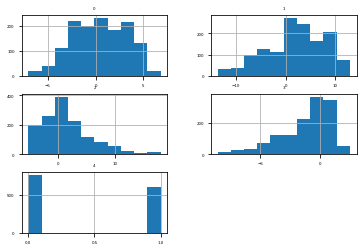

In [ ]:
dataset = pd.read_csv('drive/My Drive/Dataset/data_banknote_authentication.txt', header=None)
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the histograms
plt.show()

In [ ]:
print(dataset.shape)
print(dataset.describe)

(1372, 5)
<bound method NDFrame.describe of             0         1        2        3  4
0     3.62160   8.66610  -2.8073 -0.44699  0
1     4.54590   8.16740  -2.4586 -1.46210  0
2     3.86600  -2.63830   1.9242  0.10645  0
3     3.45660   9.52280  -4.0112 -3.59440  0
4     0.32924  -4.45520   4.5718 -0.98880  0
...       ...       ...      ...      ... ..
1367  0.40614   1.34920  -1.4501 -0.55949  1
1368 -1.38870  -4.87730   6.4774  0.34179  1
1369 -3.75030 -13.45860  17.5932 -2.77710  1
1370 -3.56370  -8.38270  12.3930 -1.28230  1
1371 -2.54190  -0.65804   2.6842  1.19520  1

[1372 rows x 5 columns]>


In [ ]:
dataset.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Data Preprocessing

In [ ]:
data = dataset.values
X, y = data[:,:-1], data[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training the alogorithm

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(C=1,kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# making Prediction

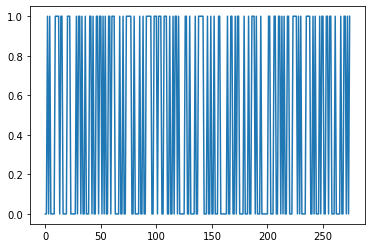

In [ ]:
y_pred = svclassifier.predict(X_test)
plt.plot(y_pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[153   4]
 [  1 117]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       157
         1.0       0.97      0.99      0.98       118

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



# Plot Decision Boudary of Classifier

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X_mat = np.asmatrix(X_train[:,0:2])
y_mat = np.asmatrix(y_train)
mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50
    
x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
xx1 = np.asmatrix([xx,X_train[2:4]])
#Z = svclassifier.predict(np.c_[xx1.ravel(),yy.ravel()])

In [ ]:
print(xx.shape)
print(X_mat.shape)

(2873, 1587)
(1097, 2)


In [ ]:
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y_train, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# SVM analysis

In [ ]:
from pandas import read_csv

dataset = read_csv('drive/My Drive/InvertPhaseLong2.csv', header=0)

               850nm          640nm  ...  Channel 7  Channel 8
count   20665.000000   20665.000000  ...    20665.0    20665.0
mean   817663.068764 -777540.398306  ...        0.0        0.0
std     26649.696060   13677.458630  ...        0.0        0.0
min         0.000000 -823380.000000  ...        0.0        0.0
25%    808706.000000 -785469.000000  ...        0.0        0.0
50%    826957.000000 -773174.000000  ...        0.0        0.0
75%    834737.000000 -767922.000000  ...        0.0        0.0
max    857234.000000 -752898.000000  ...        0.0        0.0

[8 rows x 8 columns]


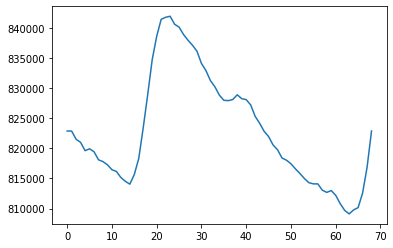

In [ ]:
from matplotlib import pyplot

print(dataset.describe())
data = dataset.values
ppg1 = data[:,0]
pyplot.plot(ppg1[1:70])
pyplot.show()

Test extract features

In [ ]:
from numpy import mean, std
import numpy as np
from scipy.stats import kurtosis, skew

x = np.random.normal(0, 2, 10000)

print(mean(x))
print(std(x))
print(skew(x))
print(kurtosis(x))
print(min(x))
print(max(x))

0.025693188166467484
2.0028446445868417
-0.011624633925582674
0.02100408541144505
-7.805830333307971
7.359324411572865


In [ ]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance*overlap
    
  return np.asarray(s) # return a nd array

data = load_data('drive/My Drive/InvertPhaseLong2.csv')  
ppg = segment_data(data[:,0],70,0.5)
ppg1 = segment_data(data[:,2],70,0.5)
#ppg2 = segment_data(data[:,1],70,0.5)

data2 = load_data('drive/My Drive/Dataset/longcunDB2.csv')
ppg2 = segment_data(data2[:,1],70,0.5)

# Prepare Data

In [ ]:
# label for first group of Data
y1 = [1]*ppg.shape[0];
y2 = [0]*ppg1.shape[0];
y3 = [2]*ppg2.shape[0];

y1 = np.asarray(y1)
y2 = np.asarray(y2)
y3 = np.asarray(y3)

#ydf1 = DataFrame(y1)
#ydf2 = DataFrame(y2)
# Concatenate data
X = np.concatenate((ppg, ppg1,ppg2))
y = np.concatenate((y1, y2, y3))
print(X.shape)

# rescale data
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
def scaling(signal):
  scaler = MinMaxScaler()
  s_trans = signal.transpose()
  Xscaled = scaler.fit_transform(s_trans)
  Xscaled = Xscaled.transpose()
  return Xscaled  
# Scaling Input Data 
Xscaled = scaling(X)
Xscaled2 = scaling(ppg2)

(1767, 70)


# Extract features

In [ ]:
"""
def feature_extraction(data):
  feats = list()
  for x in data:
     Smax = max(x)
     Smin = min(x)
     Smean = mean(x)
     Sstd = std(x)
     Sskew = skew(x)
     Skur = kurtosis(x)
     feat = [Smax, Smin, Smean, Sstd, Sskew, Skur]
     feats.append(feat)
  return feats
"""
def feature_extraction(data):
  feats = list()
  for x in data:
     #Smax = max(x)
     #Smin = min(x)
     Smean = mean(x)
     Sstd = std(x)
     Sskew = skew(x)
     Skur = kurtosis(x)
     feat = [Smean, Sstd, Sskew, Skur]
     feats.append(feat)
  return feats
# extrcat features
Xfeats = np.asarray(feature_extraction(Xscaled))

In [ ]:
Xfeats = np.asarray(feature_extraction(Xscaled))

Xfeats[1:10],Xfeats[1000:1010]

(array([[ 0.43786904,  0.2726936 ,  0.35130586, -0.80664434],
        [ 0.51970154,  0.29894547, -0.14600974, -1.19726093],
        [ 0.40405504,  0.28695542,  0.60713025, -0.8110396 ],
        [ 0.44423163,  0.26042626,  0.23588079, -0.73692575],
        [ 0.50067137,  0.27882058, -0.03877264, -1.08611384],
        [ 0.40016814,  0.29196165,  0.60859373, -0.81885641],
        [ 0.39130619,  0.27137551,  0.60704672, -0.49220309],
        [ 0.48698962,  0.29641676,  0.05794438, -1.11720208],
        [ 0.42286561,  0.29895198,  0.39555024, -1.14374535]]),
 array([[ 0.67553358,  0.2560859 , -1.11655951,  0.35769611],
        [ 0.67124532,  0.24955072, -1.08042077,  0.6380479 ],
        [ 0.54904637,  0.29387897, -0.31397424, -0.94527994],
        [ 0.61985902,  0.31696903, -0.52700763, -1.14279254],
        [ 0.64358527,  0.25596753, -1.04648844,  0.22133795],
        [ 0.60087589,  0.26269645, -0.65599418, -0.44920149],
        [ 0.568     ,  0.29588917, -0.43279729, -0.97806134],
      

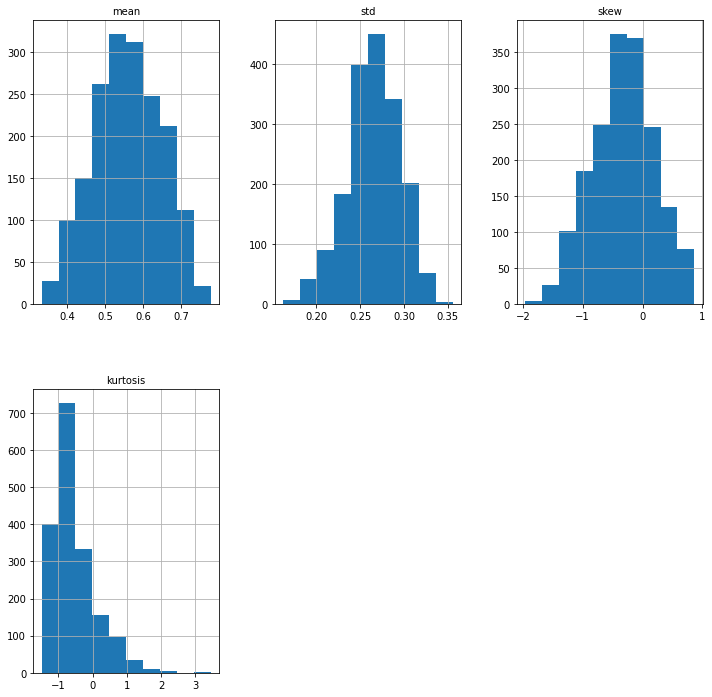

,mean,std,skew,kurtosis
count,1767.000000,1767.000000,1767.000000,1767.000000
mean,0.558825,0.265209,-0.324293,-0.542816
std,0.088158,0.029930,0.515729,0.630729
min,0.332811,0.162764,-1.960548,-1.492377
25%,0.497274,0.246982,-0.674218,-0.977330
50%,0.558336,0.266045,-0.308063,-0.721131
75%,0.626052,0.286003,0.033165,-0.268378
max,0.776932,0.355401,0.864645,3.453244


In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt

#plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
#featnames = ["max", "min","mean","std","skew","kurtosis"]
featnames = ["mean","std","skew","kurtosis"]
# show historgram of features
featset = DataFrame(Xfeats, columns= featnames)
#plt.figure(figsize=(18, 18))
fig = featset.hist(xlabelsize=10, ylabelsize=10,figsize=[12,12],layout=[2,3],)
[x.title.set_size(10) for x in fig.ravel()]

# show the histograms
#plt.suptitle("This is Figure title")
plt.show()
featset.describe()



# Data Processing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xfeats, y, test_size=0.4, random_state=1)

Train Data

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(C=1,kernel='linear',) # 'linear', 'poly', 'rbf', 'sigmoid', ‘precomputed’
svclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Confuse matrix

[[220  12  11]
 [ 20 190  21]
 [ 22  72 139]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       243
           1       0.69      0.82      0.75       231
           2       0.81      0.60      0.69       233

    accuracy                           0.78       707
   macro avg       0.78      0.77      0.77       707
weighted avg       0.78      0.78      0.77       707



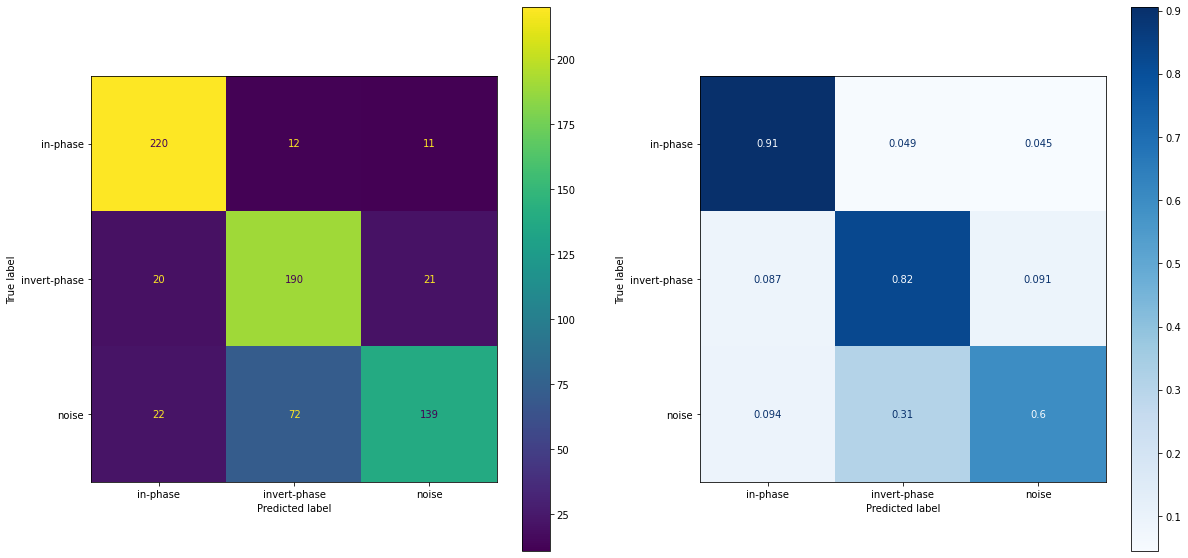

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# making prediction
y_pred = svclassifier.predict(X_test)

# confuse matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
# plot confuse matrix
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
#_, ax = plt.subplots(figsize=(10, 10))
class_names = ["in-phase", "invert-phase","noise"]
plot_confusion_matrix(svclassifier, X_test, y_test,display_labels=class_names, values_format='d' ,
                                            ax=ax1)
#_, bx = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svclassifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true', values_format='.2g',ax=ax2)
#plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.show()

In [ ]:
svclassifier.score(X_test, y_test)

0.7765205091937766

In [ ]:
report = classification_report(y_test,y_pred, output_dict=True)
print(report)
print(report['accuracy'])


{'0': {'precision': 0.8396946564885496, 'recall': 0.9053497942386831, 'f1-score': 0.8712871287128712, 'support': 243}, '1': {'precision': 0.6934306569343066, 'recall': 0.8225108225108225, 'f1-score': 0.7524752475247525, 'support': 231}, '2': {'precision': 0.8128654970760234, 'recall': 0.5965665236051502, 'f1-score': 0.6881188118811881, 'support': 233}, 'accuracy': 0.7765205091937766, 'macro avg': {'precision': 0.7819969368329599, 'recall': 0.7748090467848853, 'f1-score': 0.7706270627062706, 'support': 707}, 'weighted avg': {'precision': 0.7830635701517055, 'recall': 0.7765205091937766, 'f1-score': 0.7721021748568067, 'support': 707}}
0.7765205091937766


# Evaluating the Model

Param=0.10: 86.704% (+/-0.000)
Param=0.30: 86.704% (+/-0.000)
Param=0.50: 86.704% (+/-0.000)
Param=0.70: 86.704% (+/-0.000)
Param=0.90: 86.704% (+/-0.000)
Param=1.00: 86.704% (+/-0.000)
Param=3.00: 86.704% (+/-0.000)
Param=5.00: 86.704% (+/-0.000)
Param=7.00: 86.704% (+/-0.000)
Param=10.00: 86.704% (+/-0.000)
Param=20.00: 86.704% (+/-0.000)
Param=0.10: 78.359% (+/-0.000)
Param=0.30: 82.744% (+/-0.000)
Param=0.50: 85.856% (+/-0.000)
Param=0.70: 86.846% (+/-0.000)
Param=0.90: 86.704% (+/-0.000)
Param=1.00: 86.704% (+/-0.000)
Param=3.00: 86.987% (+/-0.000)
Param=5.00: 87.412% (+/-0.000)
Param=7.00: 87.412% (+/-0.000)
Param=10.00: 86.846% (+/-0.000)
Param=20.00: 86.704% (+/-0.000)
Param=0.10: 84.724% (+/-0.000)
Param=0.30: 87.270% (+/-0.000)
Param=0.50: 86.704% (+/-0.000)
Param=0.70: 86.704% (+/-0.000)
Param=0.90: 86.704% (+/-0.000)
Param=1.00: 87.129% (+/-0.000)
Param=3.00: 86.704% (+/-0.000)
Param=5.00: 86.421% (+/-0.000)
Param=7.00: 85.997% (+/-0.000)
Param=10.00: 85.997% (+/-0.000)
Par

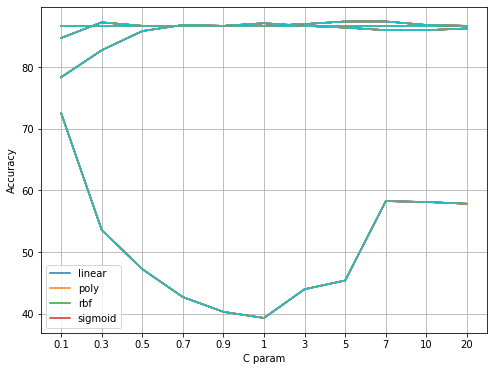

In [ ]:

# fit and evaluate the model
def evaluate_model(trainX, trainy, testX, testy, n_Cs='1', n_kernels='rbf',n_gammas='scale'):
  svclassifier = SVC(C=n_Cs,kernel=n_kernels,gamma=n_gammas) # 'linear', 'poly', 'rbf', 'sigmoid', ‘precomputed’ 
  svclassifier.fit(X_train, y_train)
  y_pred = svclassifier.predict(X_test)
  report = classification_report(y_test,y_pred, output_dict=True)
  accuracy = report['accuracy']
  return accuracy

# summarize scores
#def summarize_results(scores, params, kernels):
def summarize_results(models, params, kernels):
  #pyplot.figure(figsize=(6,4))
  fig, ax = plt.subplots(figsize=(8,6))
  colors = ['b','c','g','r']
  for j in range(len(models)):
    scores = models[j]
  #print(scores, params)
  # summarize mean and standard deviation
    for i in range(len(scores)):
      m, s = mean(scores[i]), std(scores[i])
      print('Param=%.2f: %.3f%% (+/-%.3f)' % (params[i], m, s))
	  # boxplot of scores
    
    #pyplot.boxplot(scores, labels=params)
    s_params = [str(x) for x in params]
    ax.plot(s_params, scores)
    #ax.plot(s_params, scores, color=colors[j])
  ax.legend(kernels)
  ax.xaxis.set_label_text('C param')
  ax.yaxis.set_label_text('Accuracy')
  ax.grid(True)
  plt.savefig('exp_svm_C_Kernels.png')

#
def run_experiment(params, repeats=10, kernel = 'linear'):
	# load data
	#X_train, y_train, X_test, y_test = load_dataset()
	# test each parameter
  all_scores = list()
  for p in params:
  # repeat experiment
    scores = list()
    for r in range(repeats):
			#score = evaluate_model(X_train, y_train, X_test, y_test, n_Cs=p)
      score = evaluate_model(X_train, y_train, X_test, y_test, n_Cs=100, n_kernels= kernel, n_gammas= p)
      score = score * 100.0
			#print('>p=%d #%d: %.3f' % (p, r+1, score))
      scores.append(score)
    all_scores.append(scores)
	
  # summarize results
  #summarize_results(all_scores, params, n_kernels)
  return all_scores

def run_model(kernels, params, repeats=10):
	# load data
	#X_train, y_train, X_test, y_test = load_dataset()
	# test each parameter
  models = list()
  for k in kernels:
		# repeat experiment
    scores = run_experiment(params = params, repeats = repeats, kernel = k)
		# summarize results
    models.append(scores)
  summarize_results(models, params, kernels = kernels)
  return models 
# parameter
n_params = [0.1, 0.3, 0.5, 0.7, 0.9, 1, 3, 5, 7, 10, 20]
#n_params = [0.1, 0.3, 0.5, 0.7, 0.9, 1, 3, 5, 7, 10, 100, 1000, 10000]
n_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
model = run_model(kernels = n_kernels, params= n_params)

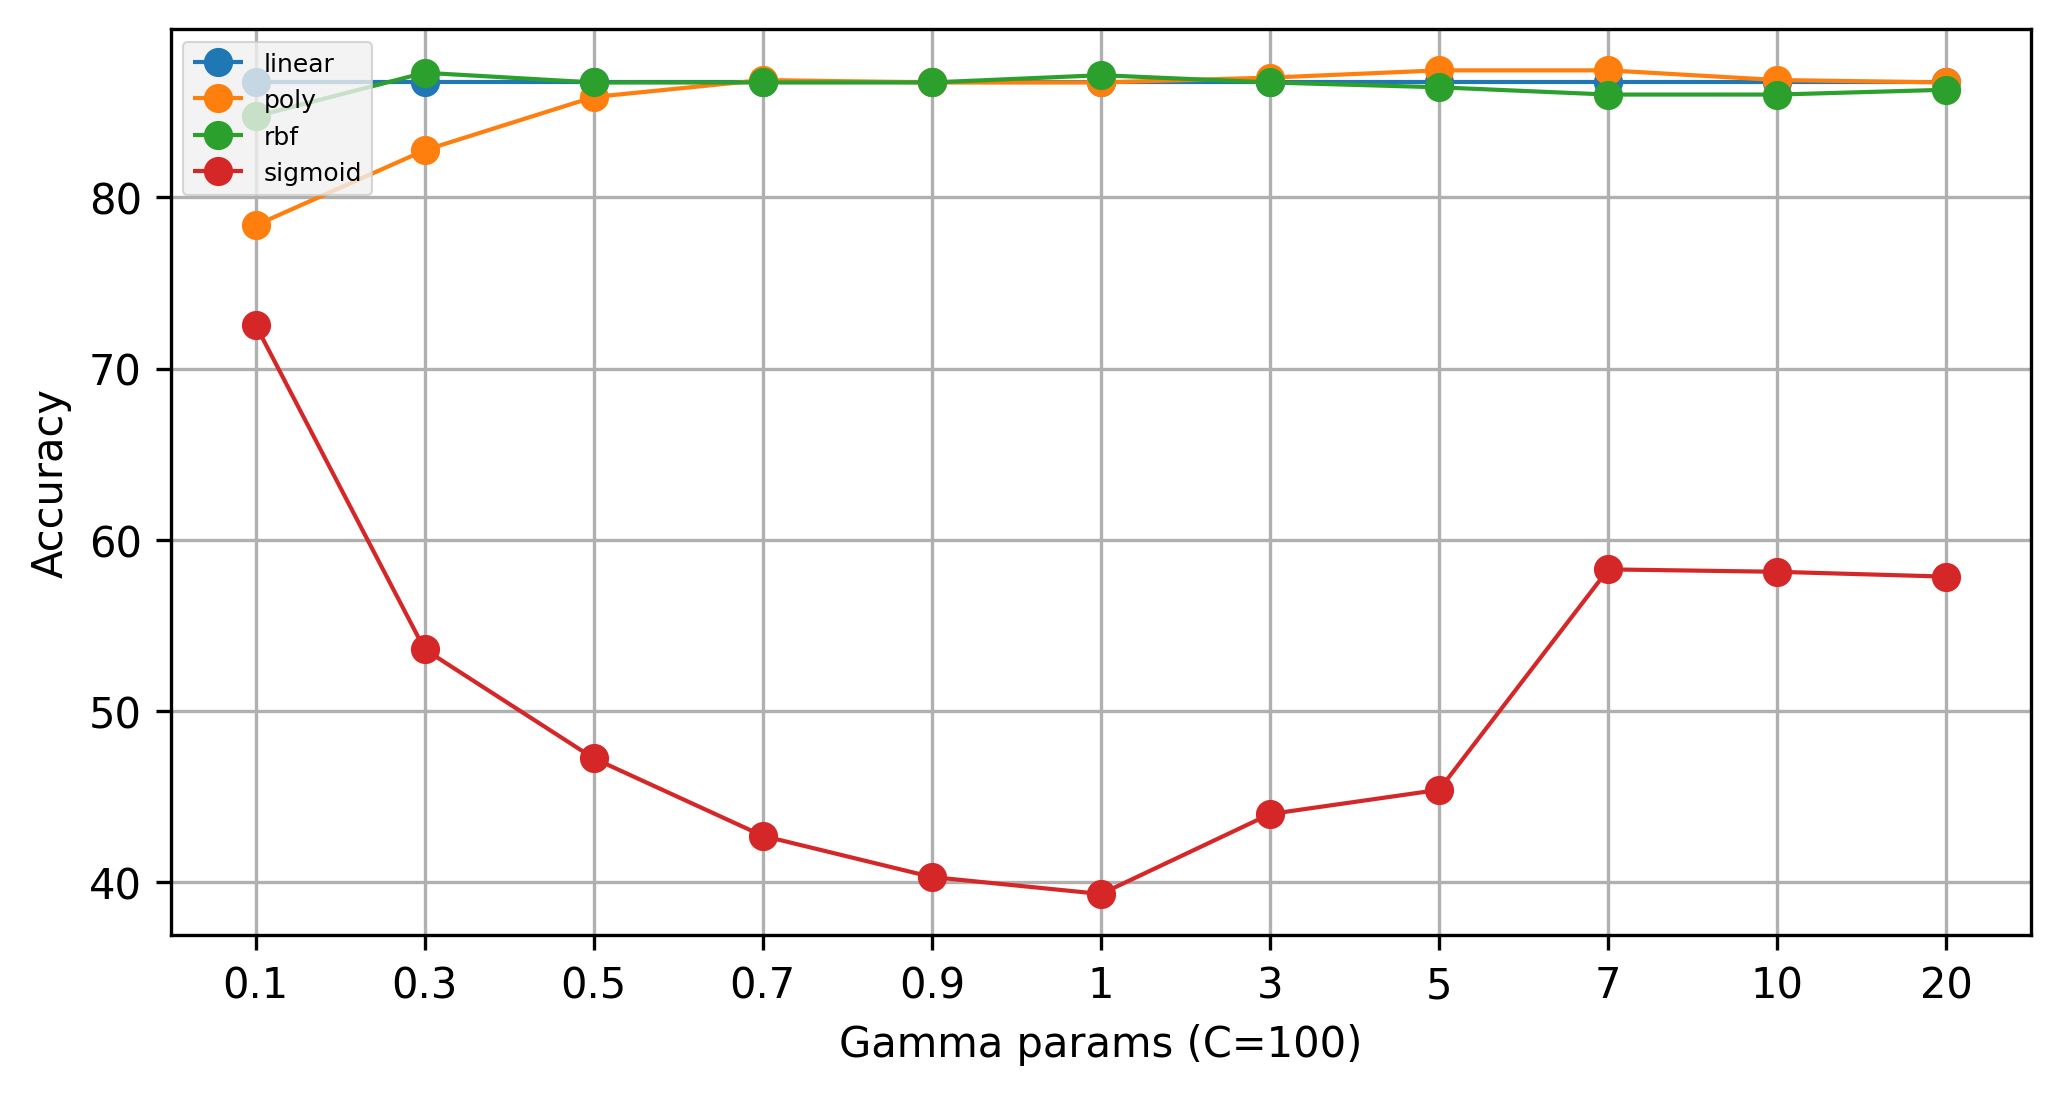

In [ ]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
from cycler import cycler

def summarize_results(models, params, kernels):
  #pyplot.figure()
  #_, ax = plt.subplots(figsize=(8,6))
  fig = plt.figure(figsize=(8,4),dpi=300)
  ax = fig.add_subplot(111)
  #colors = ['b','c','g','r']
  
  val = [1,5,7,8]
  styles = []
  values = range(10)
  jet = cm = plt.get_cmap('jet') 
  cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
  scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
  # style
  plt.style.use('fivethirtyeight')#'fivethirtyeight'
 
  # create a color palette
  #palette = plt.get_cmap('Set2')
  ccolors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf',
          '#1a55FF']
  num=0
  mpl.rcParams['axes.prop_cycle'] = cycler( color=ccolors)
  for j in range(len(models)):
    scores = models[j]
    mean_scores = []#list()
    #num+=1
    colorVal = scalarMap.to_rgba(val[j])
    for i in range(len(scores)):
      m = mean(scores[i])
      mean_scores.append(m)
    s_params = [str(x) for x in params]
    #ax.plot(s_params, scores)
    
    ax.plot(s_params, mean_scores,marker='o', linewidth=1.0) #color=colors[j] color=palette(num) colorVal
  ax.legend(kernels,loc=2, prop={'size': 6})
  
  ax.xaxis.set_label_text('Gamma params (C=100)')
  ax.yaxis.set_label_text('Accuracy')
  
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    #tick.label.set_rotation('vertical')
  ax.grid(True)
  plt.show()
  #pyplot.savefig('exp_svm_C_Kernels.png',dpi=600)

summarize_results(models=model, params=n_params, kernels=n_kernels)

In [ ]:
model[1][0]